Let's take a break and do a fun exercise. Why don't we take a few minutes to analyze a classic data science problem.

### Background:
In 1973, the University of California-Berkeley (UC-Berkeley) was sued for sex discrimination. Its admission data showed that men applying to graduate school at UC-Berkley were more likely to be admitted than women.
The graduate schools had just accepted 44% of male applicants but only 35% of female applicants. The difference was so great that it was unlikely to be due to chance.
By looking at the data more closely, you may realize that there is more to the story than meets the eye.

### Data
Why don't you download the [1973 UC-Berkeley Graduate School Admission Data](http://www.calvin.edu/~stob/data/Berkeley.csv) and take a look yourself. This dataset contains information about the six most popular departments.
Feel free to examine and analyze the data with you favorite tool, like Excel, R, or even pen and paper.

### Question for you
Now, do you agree that UC-Berkeley discriminated against women during the admission process?
Yes or No?

### What do other experts say?
Once you have made a decision, see if you came to the same [conclusion as other experts](http://vudlab.com/simpsons/).
Don't worry if you didn't arrive at the same conclusion! This is a tricky exercise on a topic otherwise known as [Simpson's Paradox](http://en.wikipedia.org/wiki/Simpson%27s_paradox).
Hope you had fun! Now Dave will tell you about other type problems that you can use data science to analyze.

In [53]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
import urllib2
import csv
from pandas import DataFrame

In [127]:
response = urllib2.urlopen("http://www.calvin.edu/~stob/data/Berkeley.csv")
cr = csv.reader(response)
headers = cr.next()
lines = []
for line in cr:
    for i in range(int(line[3])):
        lines.append(line[:3]+[1])
df = DataFrame.from_records(lines, columns=headers)
df.head()

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,1
1,Admitted,Male,A,1
2,Admitted,Male,A,1
3,Admitted,Male,A,1
4,Admitted,Male,A,1


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

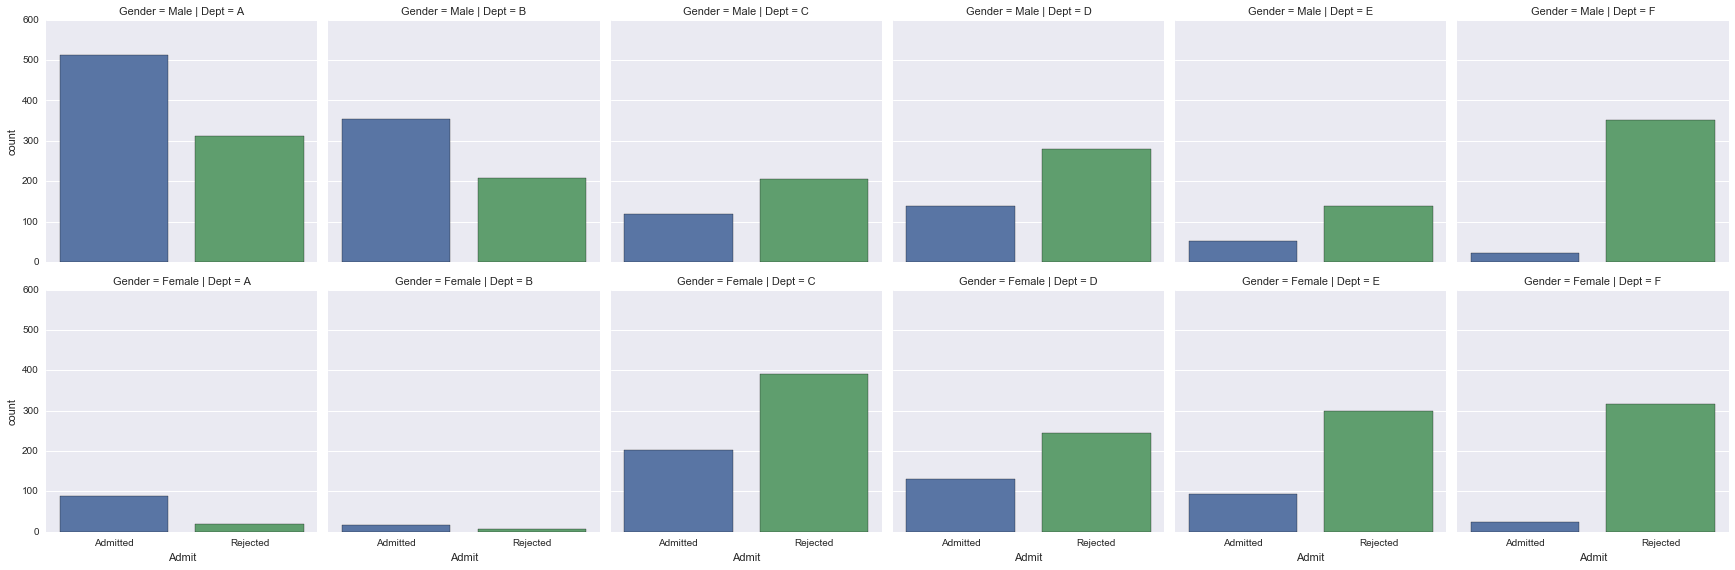

In [128]:
sns.factorplot("Admit", col="Dept", row="Gender", data=df, kind="count")
# sns.barplot(x="Dept", y="Freq", data=df, hue="Gender")

In [129]:
sns.factorplot?

In [83]:
grouped = df.groupby(['Admit', 'Dept', 'Gender']).sum()
frequency = grouped.ix["Admitted"]/(grouped.ix["Admitted"] + grouped.ix["Rejected"])
frequency

Freq
Dept Gender          
A    Female  0.824074
     Male    0.620606
B    Female  0.680000
     Male    0.630357
C    Female  0.340641
     Male    0.369231
D    Female  0.349333
     Male    0.330935
E    Female  0.239186
     Male    0.277487
F    Female  0.070381
     Male    0.058981

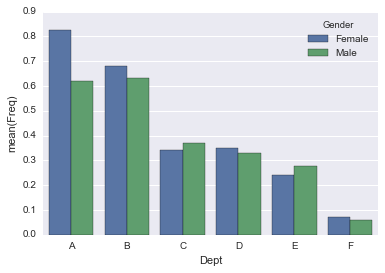

In [109]:
sns.barplot(x="Dept", y="Freq", data=frequency.reset_index(), hue="Gender")

In [114]:
gender_admit = df.groupby(["Gender", "Admit"]).sum()
gender_admit

Freq
Gender Admit         
Female Admitted   557
       Rejected  1278
Male   Admitted  1198
       Rejected  1493

In [120]:
gender_admit.loc['Female', 'Admitted'] / gender_admit.loc['Female'].sum()

Freq    0.303542
dtype: float64

In [121]:
gender_admit.loc['Male', 'Admitted'] / gender_admit.loc['Male'].sum()

Freq    0.445188
dtype: float64

In [123]:
df.groupby(['Admit', 'Dept', 'Gender']).sum()

Freq
Admit    Dept Gender      
Admitted A    Female    89
              Male     512
         B    Female    17
              Male     353
         C    Female   202
              Male     120
         D    Female   131
              Male     138
         E    Female    94
              Male      53
         F    Female    24
              Male      22
Rejected A    Female    19
              Male     313
         B    Female     8
              Male     207
         C    Female   391
              Male     205
         D    Female   244
              Male     279
         E    Female   299
              Male     138
         F    Female   317
              Male     351